In [1]:
import pandas as pd
import csv
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import shap
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
plt.style.use('ggplot')


from plotly.subplots import make_subplots
import plotly.graph_objs as go
import plotly.io as pio
import plotly.graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter


import warnings
warnings.filterwarnings(action='ignore')
import ipywidgets

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [2]:
from sklearn.model_selection import train_test_split
from IPython.display import Image
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import cross_validate, KFold

from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier ,ExtraTreesClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from mlxtend.classifier import EnsembleVoteClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import StackingClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

In [3]:
from sklearn.compose import ColumnTransformer
from sklearn.metrics import roc_curve, auc as calculate_auc

In [4]:
df_1 = pd.read_csv('../data/df_1.csv')

In [5]:
df_1

,Tofu,How many liters of water do you drink per day?,Processed Meat (es prosciutto),SEX,Do you play a sport (at least 5 hours/week)?,Do you eat differently at the weekend?,How do you sleep at night?,How many sugary drinks do you consume per day?,Raw vegetables,Cow's milk,...,How many times do you eat a day?,Nuts,Legumes,Fish,Fruits,Eggs,Whole grains food,Do you happen to eat uncontrollably even if you're not hungry?,How many times do you consume alcoholic beverages in a week?,Meat
0,Yes,2,Yes,M,No,"Yes, I eat more at home",1,1,Yes,Yes,...,5,Yes,Yes,Yes,Yes,Yes,Yes,Infrequent (1/month),1,Yes
1,Yes,3,Yes,M,Yes,"Yes, I eat at restaurants",0,1,Yes,Yes,...,6,Yes,Yes,Yes,Yes,Yes,Yes,Never,1,Yes
2,Yes,1,Yes,F,No,"Yes, I eat at restaurants",0,3,Yes,No,...,3,Yes,Yes,No,No,No,Yes,Every day,3,Yes
3,Yes,2,Yes,F,No,"Yes, I eat at restaurants",0,1,Yes,Yes,...,4,Yes,Yes,Yes,Yes,Yes,Yes,Infrequent (1/month),1,Yes
4,No,1,Yes,M,Yes,No,1,3,No,No,...,5,No,Yes,Yes,Yes,No,Yes,Often (>1/week),1,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3112,Yes,4,Yes,M,No,No,0,3,Sometimes,Sometimes,...,2,Yes,No,No,No,Yes,No,Often (>1/week),2,Sometimes
3113,No,3,Sometimes,M,No,"Yes, I eat more at home",0,0,No,No,...,4,No,No,Yes,Yes,Sometimes,Yes,Often (>1/week),2,No
3114,Sometimes,1,Yes,M,No,"Yes, I eat more at home",1,2,Sometimes,Sometimes,...,5,Sometimes,No,Yes,No,No,Yes,Often (>1/week),0,Yes
3115,No,1,Yes,F,Yes,"Yes, I eat at restaurants",0,3,No,Sometimes,...,3,No,No,Sometimes,No,Sometimes,Sometimes,Never,0,Yes


In [6]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3117 entries, 0 to 3116
Data columns (total 29 columns):
 #   Column                                                          Non-Null Count  Dtype 
---  ------                                                          --------------  ----- 
 0   Tofu                                                            3117 non-null   object
 1   How many liters of water do you drink per day?                  3117 non-null   int64 
 2   Processed Meat (es prosciutto)                                  3117 non-null   object
 3   SEX                                                             3117 non-null   object
 4   Do you play a sport (at least 5 hours/week)?                    3117 non-null   object
 5   Do you eat differently at the weekend?                          3117 non-null   object
 6   How do you sleep at night?                                      3117 non-null   int64 
 7   How many sugary drinks do you consume per day?              

In [7]:
# удалим features, которые не имеют / практически не имеют статистической значимости
df_1 = df_1.drop('How many times do you eat a day?',axis = 1)
df_1 = df_1.drop('How many liters of water do you drink per day?',axis = 1)
df_1 = df_1.drop('Raw vegetables',axis = 1)
df_1 = df_1.drop('Legumes',axis = 1)
df_1 = df_1.drop('Do you ever eat distracted or not at the table?',axis = 1)
df_1 = df_1.drop('Do you eat fast?',axis = 1)
df_1 = df_1.drop('Vegetable drinks (eg soy milk)',axis = 1)
significant_features = df_1.columns
significant_features

Index(['Tofu', 'Processed Meat (es prosciutto)', 'SEX',
       'Do you play a sport (at least 5 hours/week)?',
       'Do you eat differently at the weekend?', 'How do you sleep at night?',
       'How many sugary drinks do you consume per day?', 'Cow's milk',
       'Fresh cheeses', 'Do you ever miss meals?', 'Cooked vegetables',
       'Low-fat white yogurt', 'Do you wake up to eat at night?',
       'When are you hungry during the day?', 'Nuts', 'Fish', 'Fruits', 'Eggs',
       'Whole grains food',
       'Do you happen to eat uncontrollably even if you're not hungry?',
       'How many times do you consume alcoholic beverages in a week?', 'Meat'],
      dtype='object')

In [8]:
df_filtered = df_1[significant_features]
df_filtered


,Tofu,Processed Meat (es prosciutto),SEX,Do you play a sport (at least 5 hours/week)?,Do you eat differently at the weekend?,How do you sleep at night?,How many sugary drinks do you consume per day?,Cow's milk,Fresh cheeses,Do you ever miss meals?,...,Do you wake up to eat at night?,When are you hungry during the day?,Nuts,Fish,Fruits,Eggs,Whole grains food,Do you happen to eat uncontrollably even if you're not hungry?,How many times do you consume alcoholic beverages in a week?,Meat
0,Yes,Yes,M,No,"Yes, I eat more at home",1,1,Yes,Yes,No,...,Never,In the evening,Yes,Yes,Yes,Yes,Yes,Infrequent (1/month),1,Yes
1,Yes,Yes,M,Yes,"Yes, I eat at restaurants",0,1,Yes,Yes,No,...,Never,In the morning,Yes,Yes,Yes,Yes,Yes,Never,1,Yes
2,Yes,Yes,F,No,"Yes, I eat at restaurants",0,3,No,Sometimes,Yes,...,Often (>1/week),In the afternoon,Yes,No,No,No,Yes,Every day,3,Yes
3,Yes,Yes,F,No,"Yes, I eat at restaurants",0,1,Yes,No,No,...,Never,In the evening,Yes,Yes,Yes,Yes,Yes,Infrequent (1/month),1,Yes
4,No,Yes,M,Yes,No,1,3,No,No,No,...,Infrequent (1/month),In the afternoon,No,Yes,Yes,No,Yes,Often (>1/week),1,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3112,Yes,Yes,M,No,No,0,3,Sometimes,No,"Yes, lunch",...,Often (>1/week),In the morning,Yes,No,No,Yes,No,Often (>1/week),2,Sometimes
3113,No,Sometimes,M,No,"Yes, I eat more at home",0,0,No,Sometimes,Yes,...,Never,In the evening,No,Yes,Yes,Sometimes,Yes,Often (>1/week),2,No
3114,Sometimes,Yes,M,No,"Yes, I eat more at home",1,2,Sometimes,Sometimes,"Yes, lunch",...,Infrequent (1/month),In the afternoon,Sometimes,Yes,No,No,Yes,Often (>1/week),0,Yes
3115,No,Yes,F,Yes,"Yes, I eat at restaurants",0,3,Sometimes,Yes,"Yes, dinner",...,Infrequent (1/month),In the evening,No,Sometimes,No,Sometimes,Sometimes,Never,0,Yes


### ONE HOT ENCODING

Убираем колонки c числовыми признаками


In [9]:
df_filtered_new = df_1.drop(['How many sugary drinks do you consume per day?','How do you sleep at night?', 'How many times do you consume alcoholic beverages in a week?'], axis=1)

In [10]:
onehotencoder = OneHotEncoder()
data_new = onehotencoder.fit_transform(df_filtered_new.values)


In [11]:
data_new_dense = onehotencoder.fit_transform(df_filtered_new).toarray()

In [12]:
# get_feature_names_out() для получения имен новых признаков
data_new_df = pd.DataFrame(data_new_dense, columns=onehotencoder.get_feature_names_out())

data_new_df

,Tofu_Don't know,Tofu_No,Tofu_Sometimes,Tofu_Yes,Processed Meat (es prosciutto)_No,Processed Meat (es prosciutto)_Sometimes,Processed Meat (es prosciutto)_Yes,SEX_F,SEX_M,Do you play a sport (at least 5 hours/week)?_No,...,Whole grains food_No,Whole grains food_Sometimes,Whole grains food_Yes,Do you happen to eat uncontrollably even if you're not hungry?_Every day,Do you happen to eat uncontrollably even if you're not hungry?_Infrequent (1/month),Do you happen to eat uncontrollably even if you're not hungry?_Never,Do you happen to eat uncontrollably even if you're not hungry?_Often (>1/week),Meat_No,Meat_Sometimes,Meat_Yes
0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3112,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3113,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3114,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3115,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [13]:
numerical_features = ['How many sugary drinks do you consume per day?','How do you sleep at night?',
                       'How many times do you consume alcoholic beverages in a week?']
numerical_data = df_1[numerical_features]

# соединяем числовые данные с категориальными данными после OneHotEncoding
final_df = pd.concat([data_new_df, numerical_data.reset_index(drop=True)], axis=1)
final_df

,Tofu_Don't know,Tofu_No,Tofu_Sometimes,Tofu_Yes,Processed Meat (es prosciutto)_No,Processed Meat (es prosciutto)_Sometimes,Processed Meat (es prosciutto)_Yes,SEX_F,SEX_M,Do you play a sport (at least 5 hours/week)?_No,...,Do you happen to eat uncontrollably even if you're not hungry?_Every day,Do you happen to eat uncontrollably even if you're not hungry?_Infrequent (1/month),Do you happen to eat uncontrollably even if you're not hungry?_Never,Do you happen to eat uncontrollably even if you're not hungry?_Often (>1/week),Meat_No,Meat_Sometimes,Meat_Yes,How many sugary drinks do you consume per day?,How do you sleep at night?,How many times do you consume alcoholic beverages in a week?
0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1,1,1
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1,0,1
2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3,0,3
3,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1,0,1
4,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3112,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,3,0,2
3113,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0,0,2
3114,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2,1,0
3115,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,3,0,0


In [14]:
#  final_df.to_csv('data_new.csv', index=False)

In [15]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier ,ExtraTreesClassifier,StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

In [16]:
from sklearn.compose import ColumnTransformer
from sklearn.metrics import roc_curve, auc as calculate_auc

In [17]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from mlxtend.classifier import EnsembleVoteClassifier

In [18]:
X = final_df.drop('How do you sleep at night?', axis=1)
y = final_df['How do you sleep at night?']

In [19]:
X.columns = [col.replace(' ', '_').replace('?', '').replace('%', '').replace('(', '').replace(')', '').replace(',', '').replace(':', '').replace('{', '').replace('}', '') for col in X.columns]

In [20]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

In [21]:
print(X_train.shape)
print(X_test.shape)

(2493, 65)
(624, 65)


In [22]:
sel = VarianceThreshold(threshold=0)
sel.fit(X_train)

VarianceThreshold(threshold=0)

In [23]:
X_train_t = sel.transform(X_train)
X_test_t = sel.transform(X_test)


In [24]:
print(X_train_t.shape)
print(X_test_t.shape)

(2493, 65)
(624, 65)


### CrossValidation

сравнение производительности нескольких классификаторов машинного обучения на основе метрик (precision,  recall, F1-мера и время обучения/предсказания)

**cv_results** - это DataFrame, используемый для хранения результатов оценки каждой модели по метрикам и времени обучения/предсказания

**scoring** определяет используемые метрики для оценки моделей

Для каждой модели из list_of_models кросс-валидация и результаты оценки (средние значения)  в cv_results для каждой модели.

In [25]:
list_of_models = [
    CatBoostClassifier(random_state=42, silent=True),  # CatBoostClassifier поддерживает random_state
    RandomForestClassifier(random_state=42),  # RandomForestClassifier поддерживает random_state
    XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),  # XGBClassifier поддерживает random_state
    LGBMClassifier(random_state=42),  # LGBMClassifier поддерживает random_state
    GradientBoostingClassifier(random_state=42)  # GradientBoostingClassifier поддерживает random_state
]

list_of_model_names = [type(x).__name__ for x in list_of_models]

cv_results = pd.DataFrame(
    data=0.0,
    index=list_of_model_names,
    columns=['fit_time', 'score_time', 'accuracy', 'precision', 'recall', 'f1'])

scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='macro'),
    'recall': make_scorer(recall_score, average='macro'),
    'f1': make_scorer(f1_score, average='macro')
}

#  random_state для контроля случайного разбиения на папки
cv = KFold(n_splits=10, shuffle=True, random_state=42)

for model in list_of_models:
    cv_result = cross_validate(
        estimator=model,
        X=X_train,
        y=y_train,
        scoring=scoring,
        cv=cv, 
        n_jobs=-1)

    cv_results.loc[type(model).__name__] = list(map(np.mean, cv_result.values()))

cv_results

,fit_time,score_time,accuracy,precision,recall,f1
CatBoostClassifier,5.335011,0.022585,0.595651,0.594199,0.593867,0.593361
RandomForestClassifier,0.619995,0.029656,0.579222,0.577603,0.575880,0.574648
XGBClassifier,1.373757,0.011243,0.583224,0.582078,0.581774,0.581067
LGBMClassifier,4.907968,0.010368,0.579998,0.579251,0.579379,0.578654
GradientBoostingClassifier,0.649696,0.007634,0.581622,0.580914,0.580930,0.580393


In [26]:
model=RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## RandomForestClassifier()

Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.66      0.59       308
           1       0.58      0.47      0.52       316

    accuracy                           0.56       624
   macro avg       0.56      0.56      0.56       624
weighted avg       0.56      0.56      0.56       624

Confusion Matrix:
[[202 106]
 [169 147]]


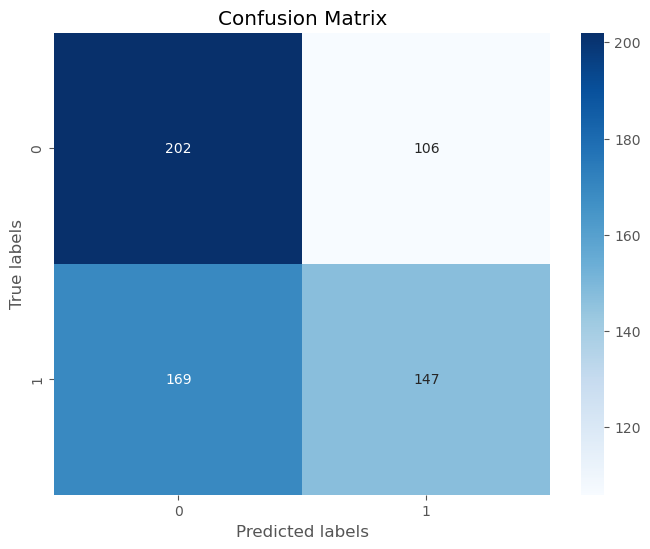

In [27]:
y_pred = model.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')

plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [28]:
y_ens =model.predict_proba(X_test)

# вероятности для класса 1
y_ens_class_1 = y_ens[:, 1]

In [29]:
auc = roc_auc_score(y_test,y_ens_class_1)
print(f"AUC-ROC_1: {auc}")

AUC-ROC_1: 0.6211316373499918


## Подбор гиперпараметров для RandomForestClassifier

In [30]:
!pip install optuna

In [31]:
import optuna 

In [32]:
def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 200, 3000)
    max_depth = trial.suggest_int('max_depth', 10, 100)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 14)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 8)
    max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2', None])
    criterion = trial.suggest_categorical('criterion', ['gini', 'entropy'])  
    bootstrap = trial.suggest_categorical('bootstrap', [True, False])

    # RandomForestClassifier с параметрами
    model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth,
                                   min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf,
                                   max_features=max_features, criterion=criterion, bootstrap=bootstrap, random_state=42)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    f1 = f1_score(y_test, preds, average='macro')
    
    return f1


study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=500)

print('Количество завершенных испытаний:', len(study.trials))
print('Лучшее испытание:', study.best_trial.params)

[I 2024-03-23 19:58:29,521] A new study created in memory with name: no-name-bb8c0a8f-0916-4cca-b15a-96a3f9ac9d95
[I 2024-03-23 19:58:31,792] Trial 0 finished with value: 0.5869859150576764 and parameters: {'n_estimators': 822, 'max_depth': 43, 'min_samples_split': 11, 'min_samples_leaf': 1, 'max_features': 'log2', 'criterion': 'gini', 'bootstrap': False}. Best is trial 0 with value: 0.5869859150576764.
[I 2024-03-23 19:58:39,267] Trial 1 finished with value: 0.5940915577152994 and parameters: {'n_estimators': 2627, 'max_depth': 33, 'min_samples_split': 13, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'criterion': 'gini', 'bootstrap': False}. Best is trial 1 with value: 0.5940915577152994.
[I 2024-03-23 19:58:43,694] Trial 2 finished with value: 0.5984307910913416 and parameters: {'n_estimators': 1984, 'max_depth': 66, 'min_samples_split': 13, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'criterion': 'gini', 'bootstrap': True}. Best is trial 2 with value: 0.5984307910913416.
[I 202

[I 2024-03-23 20:02:17,496] Trial 28 finished with value: 0.5544139404898899 and parameters: {'n_estimators': 1819, 'max_depth': 25, 'min_samples_split': 5, 'min_samples_leaf': 8, 'max_features': None, 'criterion': 'entropy', 'bootstrap': False}. Best is trial 14 with value: 0.6072497463102593.
[I 2024-03-23 20:02:26,187] Trial 29 finished with value: 0.5756632837051157 and parameters: {'n_estimators': 2807, 'max_depth': 44, 'min_samples_split': 9, 'min_samples_leaf': 1, 'max_features': 'log2', 'criterion': 'entropy', 'bootstrap': False}. Best is trial 14 with value: 0.6072497463102593.
[I 2024-03-23 20:02:28,469] Trial 30 finished with value: 0.5986622073578596 and parameters: {'n_estimators': 949, 'max_depth': 32, 'min_samples_split': 2, 'min_samples_leaf': 6, 'max_features': 'log2', 'criterion': 'entropy', 'bootstrap': False}. Best is trial 14 with value: 0.6072497463102593.
[I 2024-03-23 20:02:32,317] Trial 31 finished with value: 0.5958881578947369 and parameters: {'n_estimators':

[LightGBM] [Info] Number of positive: 1078, number of negative: 1166
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012579 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 142
[LightGBM] [Info] Number of data points in the train set: 2244, number of used features: 65
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.480392 -> initscore=-0.078472
[LightGBM] [Info] Start training from score -0.078472
[LightGBM] [Info] Number of positive: 1074, number of negative: 1170
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010611 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 142
[LightGBM] [Info] Number of data points in the train set: 2244, number of used features: 65
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.478610 -> initscore=-0.085614
[LightGBM]

[I 2024-03-23 20:03:36,418] Trial 40 finished with value: 0.5401360544217687 and parameters: {'n_estimators': 1920, 'max_depth': 50, 'min_samples_split': 13, 'min_samples_leaf': 5, 'max_features': None, 'criterion': 'gini', 'bootstrap': False}. Best is trial 33 with value: 0.6073223793880209.
[I 2024-03-23 20:03:40,556] Trial 41 finished with value: 0.6087171052631579 and parameters: {'n_estimators': 1594, 'max_depth': 41, 'min_samples_split': 5, 'min_samples_leaf': 8, 'max_features': 'sqrt', 'criterion': 'gini', 'bootstrap': False}. Best is trial 41 with value: 0.6087171052631579.
[I 2024-03-23 20:03:46,374] Trial 42 finished with value: 0.6070074418724214 and parameters: {'n_estimators': 2188, 'max_depth': 41, 'min_samples_split': 5, 'min_samples_leaf': 8, 'max_features': 'sqrt', 'criterion': 'gini', 'bootstrap': False}. Best is trial 41 with value: 0.6087171052631579.
[I 2024-03-23 20:03:50,828] Trial 43 finished with value: 0.6103517657670159 and parameters: {'n_estimators': 1714, 

[I 2024-03-23 20:06:30,203] Trial 68 finished with value: 0.5871220215491162 and parameters: {'n_estimators': 2028, 'max_depth': 21, 'min_samples_split': 6, 'min_samples_leaf': 8, 'max_features': 'sqrt', 'criterion': 'entropy', 'bootstrap': True}. Best is trial 43 with value: 0.6103517657670159.
[I 2024-03-23 20:06:36,101] Trial 69 finished with value: 0.6038726557299525 and parameters: {'n_estimators': 2268, 'max_depth': 35, 'min_samples_split': 10, 'min_samples_leaf': 8, 'max_features': 'sqrt', 'criterion': 'gini', 'bootstrap': False}. Best is trial 43 with value: 0.6103517657670159.
[I 2024-03-23 20:06:40,171] Trial 70 finished with value: 0.6005090824945043 and parameters: {'n_estimators': 1856, 'max_depth': 12, 'min_samples_split': 7, 'min_samples_leaf': 7, 'max_features': 'log2', 'criterion': 'entropy', 'bootstrap': False}. Best is trial 43 with value: 0.6103517657670159.
[I 2024-03-23 20:06:43,675] Trial 71 finished with value: 0.6087171052631579 and parameters: {'n_estimators':

[I 2024-03-23 20:08:51,817] Trial 96 finished with value: 0.6150643101693347 and parameters: {'n_estimators': 1022, 'max_depth': 36, 'min_samples_split': 10, 'min_samples_leaf': 8, 'max_features': 'sqrt', 'criterion': 'gini', 'bootstrap': False}. Best is trial 96 with value: 0.6150643101693347.
[I 2024-03-23 20:09:05,938] Trial 97 finished with value: 0.5422806182197228 and parameters: {'n_estimators': 987, 'max_depth': 38, 'min_samples_split': 10, 'min_samples_leaf': 7, 'max_features': None, 'criterion': 'gini', 'bootstrap': False}. Best is trial 96 with value: 0.6150643101693347.
[I 2024-03-23 20:09:07,524] Trial 98 finished with value: 0.5805576802725818 and parameters: {'n_estimators': 761, 'max_depth': 43, 'min_samples_split': 9, 'min_samples_leaf': 8, 'max_features': 'sqrt', 'criterion': 'gini', 'bootstrap': True}. Best is trial 96 with value: 0.6150643101693347.
[I 2024-03-23 20:09:10,127] Trial 99 finished with value: 0.6102876734509248 and parameters: {'n_estimators': 998, 'ma

[I 2024-03-23 20:10:21,185] Trial 124 finished with value: 0.6118565127540792 and parameters: {'n_estimators': 1075, 'max_depth': 28, 'min_samples_split': 11, 'min_samples_leaf': 8, 'max_features': 'sqrt', 'criterion': 'gini', 'bootstrap': False}. Best is trial 96 with value: 0.6150643101693347.
[I 2024-03-23 20:10:23,991] Trial 125 finished with value: 0.6118565127540792 and parameters: {'n_estimators': 1078, 'max_depth': 29, 'min_samples_split': 11, 'min_samples_leaf': 8, 'max_features': 'sqrt', 'criterion': 'gini', 'bootstrap': False}. Best is trial 96 with value: 0.6150643101693347.
[I 2024-03-23 20:10:26,833] Trial 126 finished with value: 0.6102155443877486 and parameters: {'n_estimators': 1095, 'max_depth': 28, 'min_samples_split': 14, 'min_samples_leaf': 8, 'max_features': 'sqrt', 'criterion': 'gini', 'bootstrap': False}. Best is trial 96 with value: 0.6150643101693347.
[I 2024-03-23 20:10:29,848] Trial 127 finished with value: 0.6085722512442927 and parameters: {'n_estimators'

[I 2024-03-23 20:11:52,831] Trial 152 finished with value: 0.6102876734509248 and parameters: {'n_estimators': 1126, 'max_depth': 46, 'min_samples_split': 14, 'min_samples_leaf': 8, 'max_features': 'sqrt', 'criterion': 'gini', 'bootstrap': False}. Best is trial 96 with value: 0.6150643101693347.
[I 2024-03-23 20:11:55,924] Trial 153 finished with value: 0.6038726557299525 and parameters: {'n_estimators': 1189, 'max_depth': 40, 'min_samples_split': 13, 'min_samples_leaf': 8, 'max_features': 'sqrt', 'criterion': 'gini', 'bootstrap': False}. Best is trial 96 with value: 0.6150643101693347.
[I 2024-03-23 20:11:59,284] Trial 154 finished with value: 0.6118565127540792 and parameters: {'n_estimators': 1295, 'max_depth': 37, 'min_samples_split': 12, 'min_samples_leaf': 8, 'max_features': 'sqrt', 'criterion': 'gini', 'bootstrap': False}. Best is trial 96 with value: 0.6150643101693347.
[I 2024-03-23 20:12:02,681] Trial 155 finished with value: 0.6102876734509248 and parameters: {'n_estimators'

[I 2024-03-23 20:13:26,571] Trial 180 finished with value: 0.5988603519743271 and parameters: {'n_estimators': 1334, 'max_depth': 32, 'min_samples_split': 12, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'criterion': 'gini', 'bootstrap': False}. Best is trial 96 with value: 0.6150643101693347.
[I 2024-03-23 20:13:29,623] Trial 181 finished with value: 0.6102876734509248 and parameters: {'n_estimators': 1125, 'max_depth': 34, 'min_samples_split': 13, 'min_samples_leaf': 8, 'max_features': 'sqrt', 'criterion': 'gini', 'bootstrap': False}. Best is trial 96 with value: 0.6150643101693347.
[I 2024-03-23 20:13:32,433] Trial 182 finished with value: 0.6118565127540792 and parameters: {'n_estimators': 1080, 'max_depth': 28, 'min_samples_split': 13, 'min_samples_leaf': 8, 'max_features': 'sqrt', 'criterion': 'gini', 'bootstrap': False}. Best is trial 96 with value: 0.6150643101693347.
[I 2024-03-23 20:13:35,554] Trial 183 finished with value: 0.6086487153388236 and parameters: {'n_estimators'

[I 2024-03-23 20:14:42,600] Trial 208 finished with value: 0.5796056488690947 and parameters: {'n_estimators': 977, 'max_depth': 48, 'min_samples_split': 11, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'criterion': 'gini', 'bootstrap': False}. Best is trial 96 with value: 0.6150643101693347.
[I 2024-03-23 20:14:45,360] Trial 209 finished with value: 0.606926607273709 and parameters: {'n_estimators': 1035, 'max_depth': 29, 'min_samples_split': 11, 'min_samples_leaf': 8, 'max_features': 'sqrt', 'criterion': 'entropy', 'bootstrap': False}. Best is trial 96 with value: 0.6150643101693347.
[I 2024-03-23 20:14:47,728] Trial 210 finished with value: 0.6037993393570942 and parameters: {'n_estimators': 907, 'max_depth': 50, 'min_samples_split': 11, 'min_samples_leaf': 8, 'max_features': 'sqrt', 'criterion': 'gini', 'bootstrap': False}. Best is trial 96 with value: 0.6150643101693347.
[I 2024-03-23 20:14:50,457] Trial 211 finished with value: 0.6134236469030757 and parameters: {'n_estimators'

[I 2024-03-23 20:16:04,516] Trial 236 finished with value: 0.6070074418724214 and parameters: {'n_estimators': 754, 'max_depth': 59, 'min_samples_split': 10, 'min_samples_leaf': 8, 'max_features': 'sqrt', 'criterion': 'gini', 'bootstrap': False}. Best is trial 96 with value: 0.6150643101693347.
[I 2024-03-23 20:16:07,208] Trial 237 finished with value: 0.6134951823114111 and parameters: {'n_estimators': 1020, 'max_depth': 55, 'min_samples_split': 11, 'min_samples_leaf': 8, 'max_features': 'sqrt', 'criterion': 'gini', 'bootstrap': False}. Best is trial 96 with value: 0.6150643101693347.
[I 2024-03-23 20:16:09,874] Trial 238 finished with value: 0.6150643101693347 and parameters: {'n_estimators': 1023, 'max_depth': 56, 'min_samples_split': 10, 'min_samples_leaf': 8, 'max_features': 'sqrt', 'criterion': 'gini', 'bootstrap': False}. Best is trial 96 with value: 0.6150643101693347.
[I 2024-03-23 20:16:11,938] Trial 239 finished with value: 0.5899043058501522 and parameters: {'n_estimators':

[I 2024-03-23 20:17:29,226] Trial 264 finished with value: 0.6118565127540792 and parameters: {'n_estimators': 1137, 'max_depth': 54, 'min_samples_split': 10, 'min_samples_leaf': 8, 'max_features': 'sqrt', 'criterion': 'gini', 'bootstrap': False}. Best is trial 96 with value: 0.6150643101693347.
[I 2024-03-23 20:17:32,002] Trial 265 finished with value: 0.6102876734509248 and parameters: {'n_estimators': 1063, 'max_depth': 57, 'min_samples_split': 9, 'min_samples_leaf': 8, 'max_features': 'sqrt', 'criterion': 'gini', 'bootstrap': False}. Best is trial 96 with value: 0.6150643101693347.
[I 2024-03-23 20:17:34,386] Trial 266 finished with value: 0.6102155443877486 and parameters: {'n_estimators': 893, 'max_depth': 52, 'min_samples_split': 10, 'min_samples_leaf': 8, 'max_features': 'sqrt', 'criterion': 'entropy', 'bootstrap': False}. Best is trial 96 with value: 0.6150643101693347.
[I 2024-03-23 20:17:37,262] Trial 267 finished with value: 0.6118565127540792 and parameters: {'n_estimators

[I 2024-03-23 20:18:54,516] Trial 292 finished with value: 0.6020694691585324 and parameters: {'n_estimators': 421, 'max_depth': 53, 'min_samples_split': 11, 'min_samples_leaf': 8, 'max_features': 'sqrt', 'criterion': 'gini', 'bootstrap': False}. Best is trial 96 with value: 0.6150643101693347.
[I 2024-03-23 20:18:57,192] Trial 293 finished with value: 0.6150643101693347 and parameters: {'n_estimators': 1021, 'max_depth': 55, 'min_samples_split': 10, 'min_samples_leaf': 8, 'max_features': 'sqrt', 'criterion': 'gini', 'bootstrap': False}. Best is trial 96 with value: 0.6150643101693347.
[I 2024-03-23 20:18:59,395] Trial 294 finished with value: 0.5922408026755853 and parameters: {'n_estimators': 1005, 'max_depth': 56, 'min_samples_split': 10, 'min_samples_leaf': 8, 'max_features': 'log2', 'criterion': 'gini', 'bootstrap': False}. Best is trial 96 with value: 0.6150643101693347.
[I 2024-03-23 20:19:02,566] Trial 295 finished with value: 0.5957385545637777 and parameters: {'n_estimators':

[I 2024-03-23 20:20:16,299] Trial 320 finished with value: 0.6085722512442927 and parameters: {'n_estimators': 893, 'max_depth': 47, 'min_samples_split': 11, 'min_samples_leaf': 8, 'max_features': 'sqrt', 'criterion': 'gini', 'bootstrap': False}. Best is trial 96 with value: 0.6150643101693347.
[I 2024-03-23 20:20:18,238] Trial 321 finished with value: 0.6070074418724214 and parameters: {'n_estimators': 691, 'max_depth': 51, 'min_samples_split': 10, 'min_samples_leaf': 8, 'max_features': 'sqrt', 'criterion': 'gini', 'bootstrap': False}. Best is trial 96 with value: 0.6150643101693347.
[I 2024-03-23 20:20:20,359] Trial 322 finished with value: 0.5914335502098307 and parameters: {'n_estimators': 1027, 'max_depth': 49, 'min_samples_split': 12, 'min_samples_leaf': 8, 'max_features': 'sqrt', 'criterion': 'gini', 'bootstrap': True}. Best is trial 96 with value: 0.6150643101693347.
[I 2024-03-23 20:20:33,852] Trial 323 finished with value: 0.5382907880133185 and parameters: {'n_estimators': 9

[I 2024-03-23 20:21:53,758] Trial 348 finished with value: 0.605440917923568 and parameters: {'n_estimators': 1194, 'max_depth': 55, 'min_samples_split': 12, 'min_samples_leaf': 8, 'max_features': 'sqrt', 'criterion': 'gini', 'bootstrap': False}. Best is trial 96 with value: 0.6150643101693347.
[I 2024-03-23 20:21:56,191] Trial 349 finished with value: 0.6070801645904387 and parameters: {'n_estimators': 925, 'max_depth': 51, 'min_samples_split': 11, 'min_samples_leaf': 8, 'max_features': 'sqrt', 'criterion': 'gini', 'bootstrap': False}. Best is trial 96 with value: 0.6150643101693347.
[I 2024-03-23 20:21:58,901] Trial 350 finished with value: 0.6134951823114111 and parameters: {'n_estimators': 1024, 'max_depth': 58, 'min_samples_split': 11, 'min_samples_leaf': 8, 'max_features': 'sqrt', 'criterion': 'gini', 'bootstrap': False}. Best is trial 96 with value: 0.6150643101693347.
[I 2024-03-23 20:22:01,846] Trial 351 finished with value: 0.6118565127540792 and parameters: {'n_estimators': 

[I 2024-03-23 20:23:25,561] Trial 376 finished with value: 0.6134951823114111 and parameters: {'n_estimators': 1019, 'max_depth': 50, 'min_samples_split': 11, 'min_samples_leaf': 8, 'max_features': 'sqrt', 'criterion': 'gini', 'bootstrap': False}. Best is trial 96 with value: 0.6150643101693347.
[I 2024-03-23 20:23:27,903] Trial 377 finished with value: 0.6085722512442927 and parameters: {'n_estimators': 890, 'max_depth': 54, 'min_samples_split': 10, 'min_samples_leaf': 8, 'max_features': 'sqrt', 'criterion': 'gini', 'bootstrap': False}. Best is trial 96 with value: 0.6150643101693347.
[I 2024-03-23 20:23:30,582] Trial 378 finished with value: 0.6103517657670159 and parameters: {'n_estimators': 1002, 'max_depth': 28, 'min_samples_split': 12, 'min_samples_leaf': 8, 'max_features': 'sqrt', 'criterion': 'gini', 'bootstrap': False}. Best is trial 96 with value: 0.6150643101693347.
[I 2024-03-23 20:23:33,104] Trial 379 finished with value: 0.6119243421052631 and parameters: {'n_estimators':

[I 2024-03-23 20:24:53,596] Trial 404 finished with value: 0.6086487153388236 and parameters: {'n_estimators': 972, 'max_depth': 89, 'min_samples_split': 11, 'min_samples_leaf': 8, 'max_features': 'sqrt', 'criterion': 'entropy', 'bootstrap': False}. Best is trial 96 with value: 0.6150643101693347.
[I 2024-03-23 20:24:55,933] Trial 405 finished with value: 0.6070801645904387 and parameters: {'n_estimators': 878, 'max_depth': 90, 'min_samples_split': 10, 'min_samples_leaf': 8, 'max_features': 'sqrt', 'criterion': 'gini', 'bootstrap': False}. Best is trial 96 with value: 0.6150643101693347.
[I 2024-03-23 20:24:58,671] Trial 406 finished with value: 0.6117806754144215 and parameters: {'n_estimators': 1045, 'max_depth': 91, 'min_samples_split': 11, 'min_samples_leaf': 8, 'max_features': 'sqrt', 'criterion': 'gini', 'bootstrap': False}. Best is trial 96 with value: 0.6150643101693347.
[I 2024-03-23 20:25:01,246] Trial 407 finished with value: 0.593548137945239 and parameters: {'n_estimators'

[I 2024-03-23 20:26:25,685] Trial 432 finished with value: 0.6070801645904387 and parameters: {'n_estimators': 970, 'max_depth': 54, 'min_samples_split': 9, 'min_samples_leaf': 8, 'max_features': 'sqrt', 'criterion': 'gini', 'bootstrap': False}. Best is trial 96 with value: 0.6150643101693347.
[I 2024-03-23 20:26:28,567] Trial 433 finished with value: 0.6118565127540792 and parameters: {'n_estimators': 1084, 'max_depth': 51, 'min_samples_split': 10, 'min_samples_leaf': 8, 'max_features': 'sqrt', 'criterion': 'gini', 'bootstrap': False}. Best is trial 96 with value: 0.6150643101693347.
[I 2024-03-23 20:26:31,717] Trial 434 finished with value: 0.6053638270741639 and parameters: {'n_estimators': 1045, 'max_depth': 56, 'min_samples_split': 12, 'min_samples_leaf': 6, 'max_features': 'sqrt', 'criterion': 'gini', 'bootstrap': False}. Best is trial 96 with value: 0.6150643101693347.
[I 2024-03-23 20:26:34,749] Trial 435 finished with value: 0.6102876734509248 and parameters: {'n_estimators': 

[I 2024-03-23 20:28:01,950] Trial 460 finished with value: 0.5382907880133185 and parameters: {'n_estimators': 885, 'max_depth': 27, 'min_samples_split': 10, 'min_samples_leaf': 8, 'max_features': None, 'criterion': 'gini', 'bootstrap': False}. Best is trial 96 with value: 0.6150643101693347.
[I 2024-03-23 20:28:04,885] Trial 461 finished with value: 0.606926607273709 and parameters: {'n_estimators': 1098, 'max_depth': 79, 'min_samples_split': 11, 'min_samples_leaf': 8, 'max_features': 'sqrt', 'criterion': 'entropy', 'bootstrap': False}. Best is trial 96 with value: 0.6150643101693347.
[I 2024-03-23 20:28:07,489] Trial 462 finished with value: 0.6070801645904387 and parameters: {'n_estimators': 990, 'max_depth': 22, 'min_samples_split': 10, 'min_samples_leaf': 8, 'max_features': 'sqrt', 'criterion': 'gini', 'bootstrap': False}. Best is trial 96 with value: 0.6150643101693347.
[I 2024-03-23 20:28:09,946] Trial 463 finished with value: 0.6102876734509248 and parameters: {'n_estimators': 

[I 2024-03-23 20:29:25,748] Trial 488 finished with value: 0.606926607273709 and parameters: {'n_estimators': 1029, 'max_depth': 59, 'min_samples_split': 11, 'min_samples_leaf': 7, 'max_features': 'sqrt', 'criterion': 'gini', 'bootstrap': False}. Best is trial 96 with value: 0.6150643101693347.
[I 2024-03-23 20:29:29,577] Trial 489 finished with value: 0.6087171052631579 and parameters: {'n_estimators': 1389, 'max_depth': 26, 'min_samples_split': 10, 'min_samples_leaf': 8, 'max_features': 'sqrt', 'criterion': 'gini', 'bootstrap': False}. Best is trial 96 with value: 0.6150643101693347.
[I 2024-03-23 20:29:32,004] Trial 490 finished with value: 0.605440917923568 and parameters: {'n_estimators': 921, 'max_depth': 64, 'min_samples_split': 11, 'min_samples_leaf': 8, 'max_features': 'sqrt', 'criterion': 'gini', 'bootstrap': False}. Best is trial 96 with value: 0.6150643101693347.
[I 2024-03-23 20:29:34,920] Trial 491 finished with value: 0.6118565127540792 and parameters: {'n_estimators': 1

Количество завершенных испытаний: 500
Лучшее испытание: {'n_estimators': 1022, 'max_depth': 36, 'min_samples_split': 10, 'min_samples_leaf': 8, 'max_features': 'sqrt', 'criterion': 'gini', 'bootstrap': False}


In [33]:
best_params = {
    'n_estimators': 445,
    'max_depth': 10,
    'min_samples_split': 12,
    'min_samples_leaf': 8,
    'max_features': 'sqrt',
    'criterion': 'entropy', 'bootstrap': False
}


rf_1 = RandomForestClassifier(**best_params, random_state=42)

rf_1.fit(X_train, y_train)



RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=10,
                       min_samples_leaf=8, min_samples_split=12,
                       n_estimators=445, random_state=42)

#### Random Forest модель 1

Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.64      0.62       308
           1       0.63      0.60      0.61       316

    accuracy                           0.62       624
   macro avg       0.62      0.62      0.62       624
weighted avg       0.62      0.62      0.62       624

Confusion Matrix:
[[197 111]
 [127 189]]


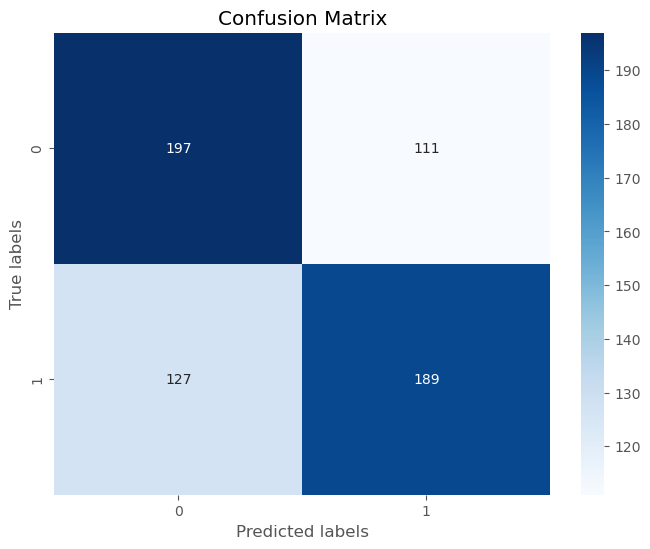

In [34]:
y_pred = rf_1.predict(X_test)


print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')

plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [35]:
y_ens =rf_1.predict_proba(X_test)

# вероятность для класса 1
y_ens_class_1 = y_ens[:, 1]

In [36]:
auc_1 = roc_auc_score(y_test,y_ens_class_1)
print(f"AUC-ROC_1: {auc_1}")

AUC-ROC_1: 0.6491348841032386


***Важность признаков (features importance)*** 

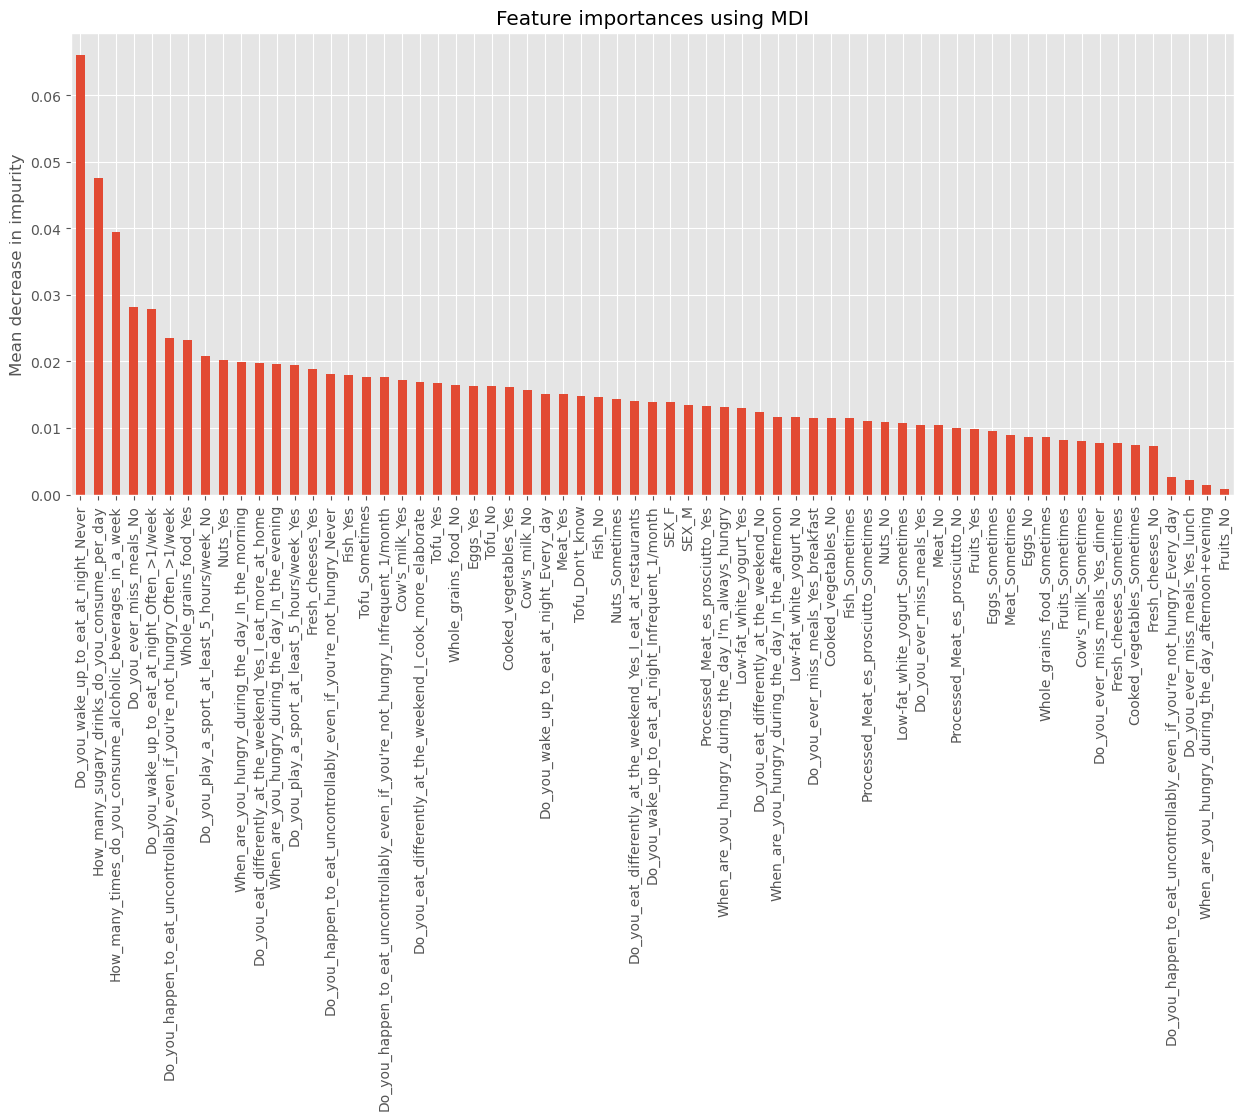

In [37]:
importances = rf_1.feature_importances_
forest_importances = pd.Series(importances, index=X.columns)

# признаки по убыванию важности
forest_importances_sorted = forest_importances.sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(15,6)) 

forest_importances_sorted.plot.bar(ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")

fig.tight_layout()
plt.show()

In [38]:
# признаки по убыванию важности
forest_importances_sorted.head(15) 

Do_you_wake_up_to_eat_at_night_Never                                           0.066114
How_many_sugary_drinks_do_you_consume_per_day                                  0.047504
How_many_times_do_you_consume_alcoholic_beverages_in_a_week                    0.039472
Do_you_ever_miss_meals_No                                                      0.028149
Do_you_wake_up_to_eat_at_night_Often_>1/week                                   0.027843
Do_you_happen_to_eat_uncontrollably_even_if_you're_not_hungry_Often_>1/week    0.023501
Whole_grains_food_Yes                                                          0.023290
Do_you_play_a_sport_at_least_5_hours/week_No                                   0.020861
Nuts_Yes                                                                       0.020276
When_are_you_hungry_during_the_day_In_the_morning                              0.019844
Do_you_eat_differently_at_the_weekend_Yes_I_eat_more_at_home                   0.019771
When_are_you_hungry_during_the_d

### Интерпретация модели

#### SHAP (SHapley Additive exPlanations): 

<Figure size 2000x1000 with 0 Axes>

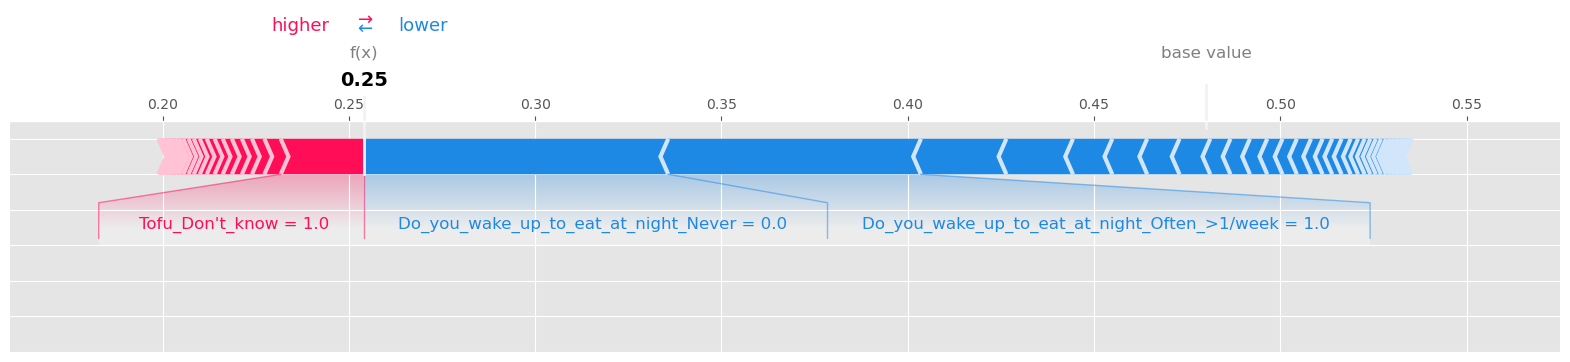

In [39]:
explainer = shap.TreeExplainer(rf_1)
shap_values = explainer.shap_values(X_test)

shap.initjs()

plt.figure(figsize=(20, 10))
shap.force_plot(
    base_value=explainer.expected_value[1],
    shap_values=shap_values[1][0],
    features=X_test.iloc[0],
    matplotlib=True
)
plt.show()

In [40]:
base_value=explainer.expected_value[1]
base_value

0.48014440433213385

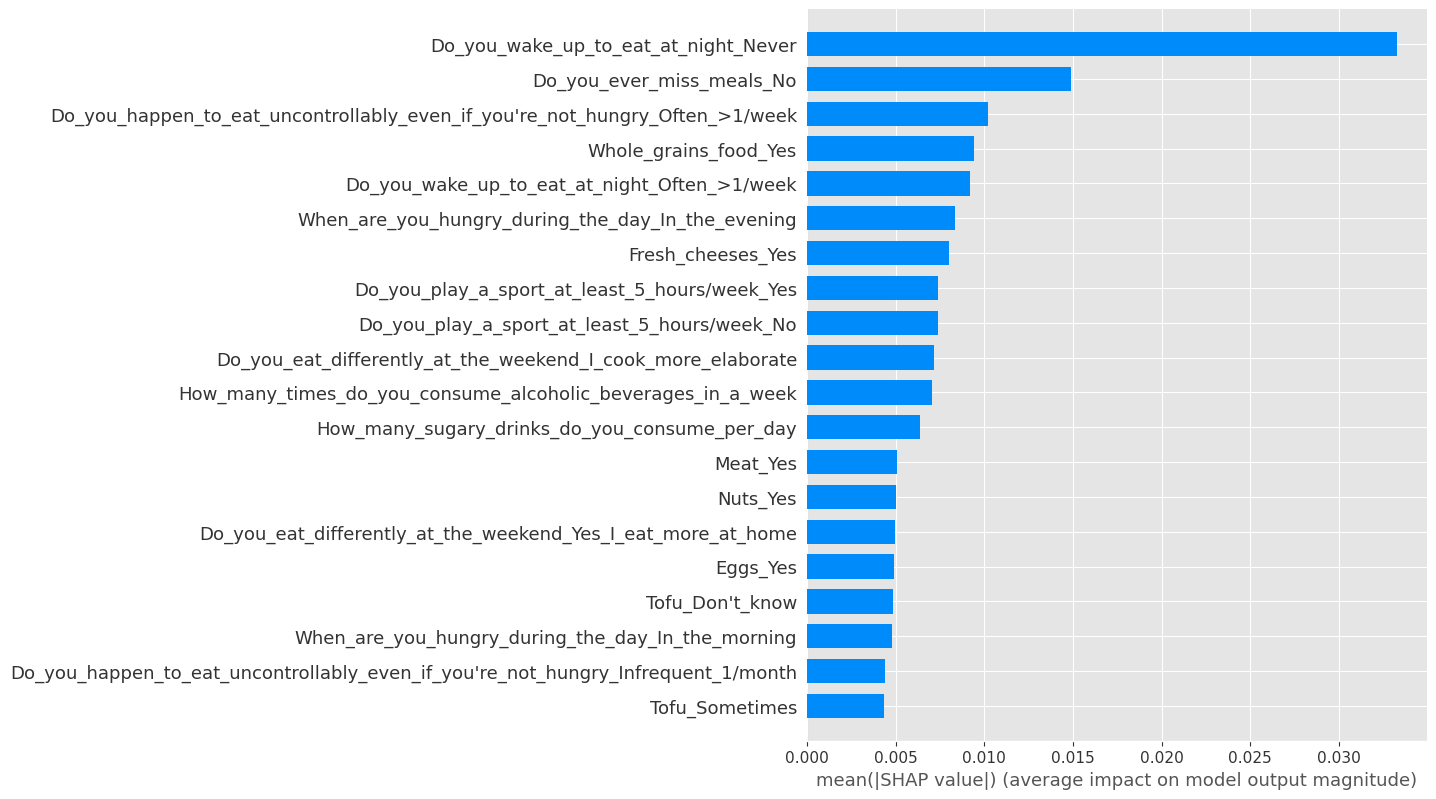

In [41]:
shap.summary_plot(shap_values[1], X_test,max_display=20, plot_type="bar")

<Figure size 2000x1500 with 0 Axes>

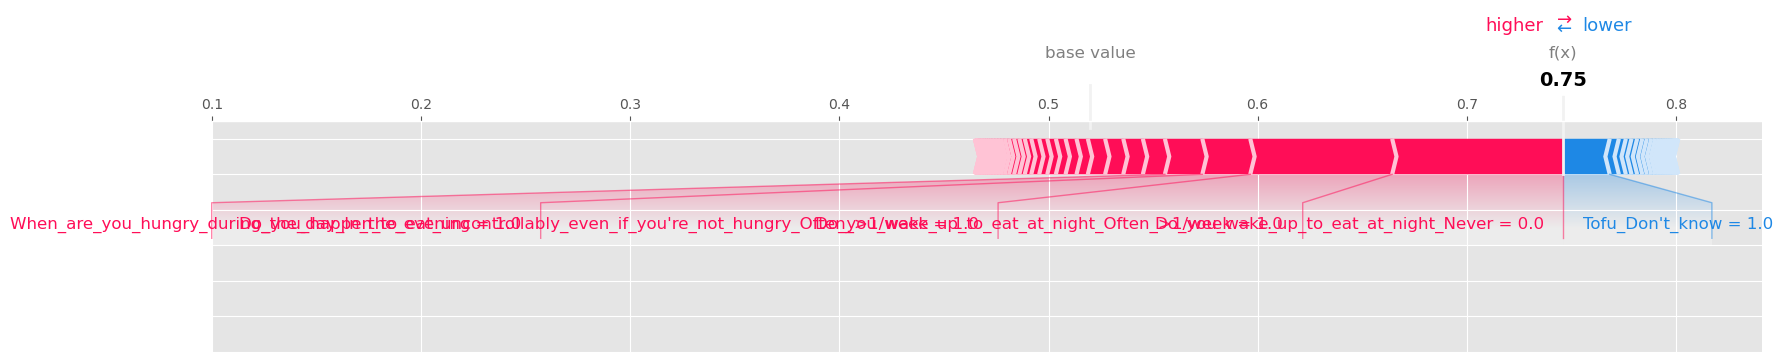

In [42]:
explainer = shap.TreeExplainer(rf_1)
shap_values_0 = explainer.shap_values(X_test)  

shap.initjs()

plt.figure(figsize=(20, 15))
shap.force_plot(
    base_value=explainer.expected_value[0], 
    shap_values=shap_values_0[0][0], 
    features=X_test.iloc[0],   
    matplotlib=True
)
plt.show()

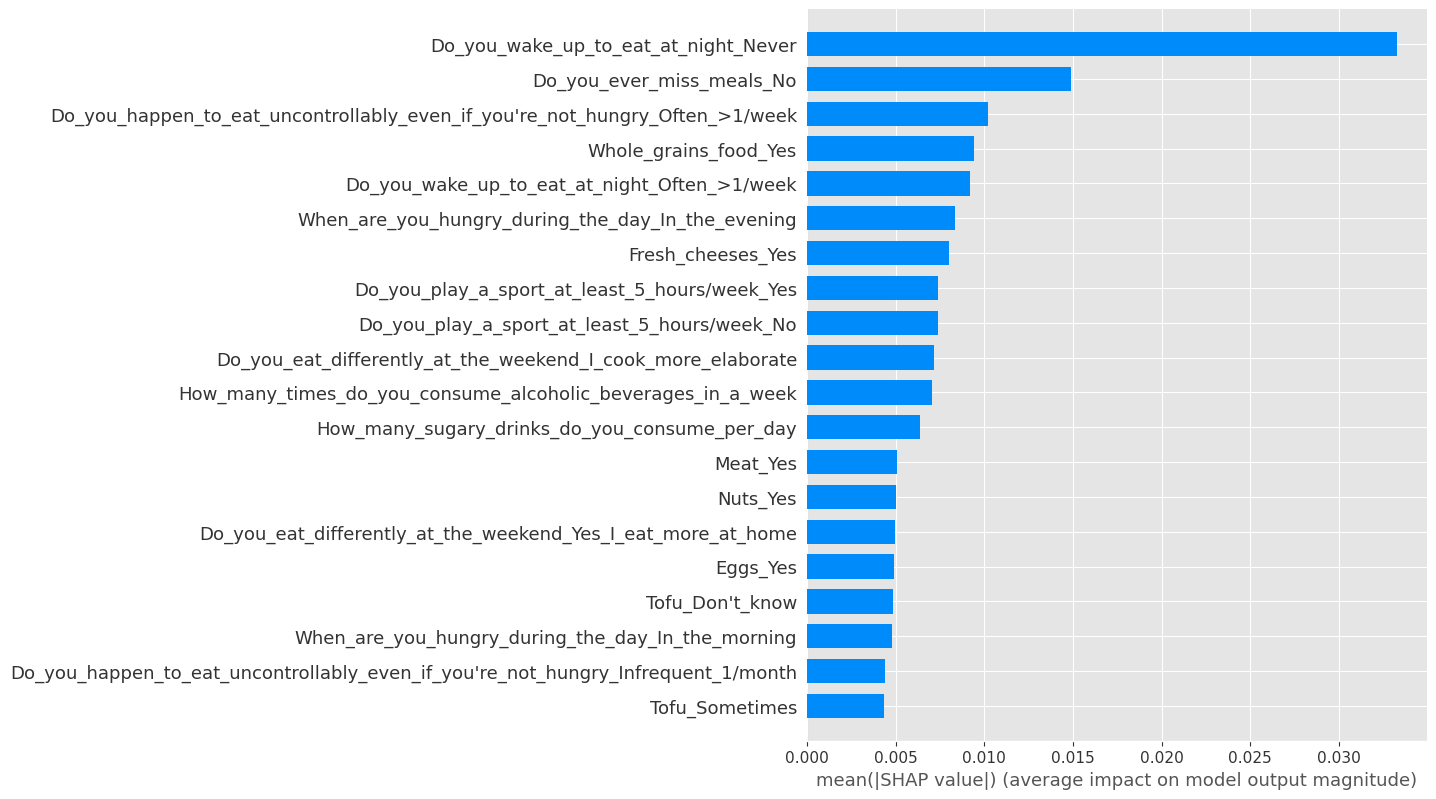

In [43]:
shap.summary_plot(shap_values_0[0], X_test,max_display=20, plot_type="bar")